## About
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## The Data

### Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

### Twitter Image Predications File
Every image in the WeRateDogs twitter archive was run through a neural network that can classify breeds of dogs. The results is a table full of the top three image predications alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

### Additional Data Via the Twitter API
Because we have the tweet IDs of the WeRateDogs twitter archieve we will be able to gather retweet count, favorite count and and any additional data we find interesting to our analysis. The twitter API requires user to be authorizes to use it. That means that we need to sign up for developers account and get authorized. If we have issues getting developers account, we can use tweet_json.txt file that contains the resulting data from querying twitter API then read read the file line by line into pandas dataframe with (minimum) tweet ID, retweet count and favorite count

## Loading Libraries

In [1]:
#Importing libraries
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

# Gather Data

### Importing Enhanced Twitter Archieve

In [2]:
# load twitter arhive enhanced dataset
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Downloading the Tweet Image Predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Make directory if it doesn't already exist
folder_name = 'tweet_image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
# load image prediction dataset
image_data = pd.read_csv('image-predictions.tsv', sep='\t')

### Getting Tweet Data from Twitter API

In [3]:
import tweepy

consumer_key = 'O0iRSndtOM55jNY72boxHPwvm'
consumer_secret = 'tVFTyQOK4HcwYcfCeWhWzn5bKNNi1V9r2wgNRS7qfRqg1GJRMA'
access_token = '1326836302629703680-texmZdRUg1MRDwTW19kiKyS3sCSusX'
access_secret = '8RgfPOtAb32mJcQyrPMLRtn57vIRZt7hhNOsdQZNRk4Mr'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
import json
from timeit import default_timer as timer

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# converting the txt file to a data list where each line contains one piece of tweet info
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [6]:
df_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [7]:
# Creating dataframe that contains id, retweet count and favorite count from the list above
tweet_data = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count'])

In [8]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
#Change the id column to tweet_id
tweet_data = tweet_data.rename(columns={'id': 'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

## Visual Assessment

In [10]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
image_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [13]:
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2156,669597912108789760,NaN,NaN,2015-11-25 19:25:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skye. He is a Bretwaldian Altostratus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669597912...,10,10,Skye,None,None,None,None
602,798644042770751489,NaN,NaN,2016-11-15 21:49:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Paull. He just stubbed ...,6.704450e+17,4.196984e+09,2015-11-28 03:31:48 +0000,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,None,None,None,None
911,757597904299253760,NaN,NaN,2016-07-25 15:26:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @jon_hill987: @dog_rates There is a cunning...,7.575971e+17,2.804798e+08,2016-07-25 15:23:28 +0000,https://twitter.com/jon_hill987/status/7575971...,11,10,None,None,None,pupper,None
957,751538714308972544,NaN,NaN,2016-07-08 22:09:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Max. She has one ear that's always sli...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751538714...,10,10,Max,None,None,None,None
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855...,11,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,279280991.0,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
2266,667530908589760512,NaN,NaN,2015-11-20 02:32:25 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,None,None,None,None
1258,710283270106132480,NaN,NaN,2016-03-17 01:55:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gunner. He's a Figamus Newton. King of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710283270...,11,10,Gunner,None,None,None,None
1268,709556954897764353,NaN,NaN,2016-03-15 01:48:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cecil. She's a Gigglefloof Poofer. Out...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709556954...,12,10,Cecil,None,None,None,None
1134,728653952833728512,NaN,NaN,2016-05-06 18:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coleman. Somebody needs to tell him th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728653952...,8,10,Coleman,None,None,None,None


In [14]:
image_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
296,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False
1569,794355576146903043,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
1762,826204788643753985,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,2,Labrador_retriever,0.782058,True,golden_retriever,0.156581,True,soft-coated_wheaten_terrier,0.007275,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
353,672591271085670400,https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg,1,gondola,0.134290,False,lifeboat,0.108356,False,bassinet,0.093679,False
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
501,675853064436391936,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True


In [15]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
867,761745352076779520,979,4707
526,808733504066486276,2509,8784
39,884562892145688576,5100,24765
968,750117059602808832,1466,4740
1120,730573383004487680,2435,5407
1773,678021115718029313,7148,15018
1171,720340705894408192,1098,3131
366,828770345708580865,6746,28085
1974,672995267319328768,328,1001
1125,729838605770891264,431,1856


## Programmatic Assessment

In [16]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
tweet_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

Some denominators have 0 value

In [18]:
tweet_archive.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [19]:
tweet_archive[tweet_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
tweet_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [21]:
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [22]:
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

## Tidiness
<li> Dog stage data is separated into 4 columns. They are supposed to be in one column
<li> All dataset is related, so it should be merged together.

## Quality
<br>

### Tweet Archieve Table


<li> Some columns have missing values that are more than ten percent of the dataset
<li> Some Dog names are invalid(None, a , an instead of name)
<li> Invalid Timestamp data type (string instead of datetime)
<li> some expanded URLs have two URLS
<li> Some denominators have values that are not equal to 10
<li> Row 313 has 0 denominator
<li> Some columns contain None instead of Nan values
<li> Text column contains description and URL
<br>

### Image Prediction Table
<li> Missing rows (2075 rows instead 2345)
<li> Some P names start with uppercase while others start with lowercase
<li> Underscores are used in multi-words names in columns p1, p2 and p3 instead of spaces
<br>




# Clean Data

In [27]:
tweet_archive_clean = tweet_archive.copy()
image_data_clean = image_data.copy()
tweet_data_clean = tweet_data.copy()

### Missing Data

#### `tweet_archive`: Missing columns

#### Define

Drop columns that have missing values up to 10 percent of the dataset

#### Code

In [28]:
tweet_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [29]:
tweet_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [30]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### `tweet_archive`: Missing values in expanded_urls column

#### Define

Drop rows that contain missing values

#### Code

In [31]:
tweet_archive_clean.dropna(inplace=True)

#### Test

In [32]:
tweet_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

# Clean Tidiness Issues

#### `tweet_archive`: Dog Stage data is separated into 4 columns

#### Define

Merge the four columns into one column named dog_stage

#### Code

In [33]:
tweet_archive_clean['dog_stage'] = tweet_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [34]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [35]:
tweet_archive_clean.dog_stage.value_counts()

pupper     263
doggo       90
puppo       34
floofer      4
Name: dog_stage, dtype: int64

In [36]:
# Drop the pupper, doggo, puppo, floofer columns
tweet_archive_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)

In [37]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### All dataset is Related, but divided into three datset

#### Define

Merge all dataset into one dataset called all_df based on tweet id.

In [38]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   dog_stage           391 non-null    object
dtypes: int64(3), object(6)
memory usage: 179.5+ KB


In [39]:
all_df = tweet_archive_clean.merge(tweet_data_clean, on='tweet_id', how='left').merge(image_data_clean, on='tweet_id', how='left')

In [40]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2297 non-null   int64  
 1   timestamp           2297 non-null   object 
 2   source              2297 non-null   object 
 3   text                2297 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2297 non-null   int64  
 6   rating_denominator  2297 non-null   int64  
 7   name                2297 non-null   object 
 8   dog_stage           391 non-null    object 
 9   retweet_count       2295 non-null   float64
 10  favorite_count      2295 non-null   float64
 11  jpg_url             2075 non-null   object 
 12  img_num             2075 non-null   float64
 13  p1                  2075 non-null   object 
 14  p1_conf             2075 non-null   float64
 15  p1_dog              2075 non-null   object 
 16  p2    

In [41]:
all_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [42]:
all_df.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
dog_stage             1906
retweet_count            2
favorite_count           2
jpg_url                222
img_num                222
p1                     222
p1_conf                222
p1_dog                 222
p2                     222
p2_conf                222
p2_dog                 222
p3                     222
p3_conf                222
p3_dog                 222
dtype: int64

# Cleaning Quality Issues

#### `tweet_archive`: Some dogs names are not correct (None, a, an)

#### Define

Convert invalid names to Nan and extract the correct names from the text column

#### Code

In [43]:
all_df.name = all_df.name.replace(regex=['^[a-z]+', 'None'], value= np.nan)

In [44]:
all_df.name.isnull().sum()

795

In [45]:
# Create a function to extract the names from the text column and returned Nan if there is no name
def extract(text):
    text_list = text.split()
    for word in text_list:
        if word.lower() == 'named':
            name_index = text_list.index(word) + 1
            return text_list[name_index]
        else:
            pass
    return np.nan

In [46]:
all_df.name = np.where(all_df.name.isnull(), all_df.text.apply(extract), all_df.name)

#### Test

In [47]:
all_df.name.isnull().sum()

771

#### `tweet_archive`: Invalid Timestamp datatype

#### Define

Change timestamp datatype to datetime

#### Code

In [48]:
all_df['timestamp'] = pd.to_datetime(all_df['timestamp'])

#### Test

In [49]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                1526 non-null   object             
 8   dog_stage           391 non-null    object             
 9   retweet_count       2295 non-null   float64            
 10  favorite_count      2295 non-null   float64            
 11  jpg_url             2075 non-null   object             
 12  img_num             2075 non-null 

#### `tweet_archive`: Some expanded urls have two urls

#### Define

Extract the first url from all rows that have multiple urls

#### Code

In [50]:
all_df.expanded_urls = all_df.expanded_urls.str.split(',').str[-1]

#### Test

In [51]:
all_df.expanded_urls.iloc[27]

'https://twitter.com/dog_rates/status/886736880519319552/photo/1'

#### `tweet_archive`: Row 313 has 0 denominator

#### Define

Change row 313 denominator to 10

#### Code

Most likely row was dropped while cleaning other Issues

#### Test

In [52]:
all_df[all_df.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
410,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,3716.0,...,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
491,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://twitter.com/dog_rates/status/810984652...,24,7,Sam,NaN,1655.0,...,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
754,775096608509886464,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,9220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,2539.0,...,1.0,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
1034,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,9220.0,...,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1085,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,doggo,1434.0,...,1.0,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
1130,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,1764.0,...,1.0,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1167,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,247.0,...,1.0,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1193,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,pupper,829.0,...,1.0,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
1219,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,pupper,636.0,...,1.0,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True


#### `tweet_archive`: Some columns contain None instead of None values

#### Define

Change None to Nan values

#### Code

The values were changed and added to a new column while cleaning other issues

#### Test

In [53]:
all_df.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                   771
dog_stage             1906
retweet_count            2
favorite_count           2
jpg_url                222
img_num                222
p1                     222
p1_conf                222
p1_dog                 222
p2                     222
p2_conf                222
p2_dog                 222
p3                     222
p3_conf                222
p3_dog                 222
dtype: int64

In [54]:
all_df.name.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2292     True
2293     True
2294     True
2295     True
2296     True
Name: name, Length: 2297, dtype: bool

In [55]:
all_df.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [56]:
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 

#### `all_df`: Text column contains description and URL

#### Define

Extract the urls from the text column using regular expressions and remove the URl from the text column

#### Ccode

In [57]:
all_df['url'] = all_df.text.str.extract(pattern, expand=True)

In [58]:
# Remove URLs from the text column 
import re
all_df['text'] = all_df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])[0]

#### Test

In [59]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                1526 non-null   object             
 8   dog_stage           391 non-null    object             
 9   retweet_count       2295 non-null   float64            
 10  favorite_count      2295 non-null   float64            
 11  jpg_url             2075 non-null   object             
 12  img_num             2075 non-null 

In [60]:
all_df.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

#### `all_df`: Some P names start with uppercase while others start with lowercase

#### Define

Convert lowercase letters to uppercase

#### Code

In [61]:
all_df.p1 = all_df.p1.str.title()
all_df.p2 = all_df.p2.str.title()
all_df.p3 = all_df.p3.str.title()

#### Test

In [62]:
all_df.p1.head(7)

0                      Orange
1                   Chihuahua
2                   Chihuahua
3                 Paper_Towel
4                      Basset
5    Chesapeake_Bay_Retriever
6                 Appenzeller
Name: p1, dtype: object

In [63]:
all_df.p2.head(7)

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador_Retriever
4      English_Springer
5         Irish_Terrier
6         Border_Collie
Name: p2, dtype: object

In [64]:
all_df.p3.head(7)

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German_Short-Haired_Pointer
5                Indian_Elephant
6                      Ice_Lolly
Name: p3, dtype: object


 #### `all_df`: Underscores are used in multi-words names in columns p1, p2 and p3 instead of spaces

#### Define

Chnage underscore to space in p1, p2 and p3 columns using replace function

#### Code

In [65]:
all_df.p1 = all_df.p1.str.replace("_"," ")
all_df.p2 = all_df.p2.str.replace("_"," ")
all_df.p3 = all_df.p3.str.replace("_"," ")

#### Test

In [66]:
all_df.p1.head()

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object

In [67]:
all_df.p2.head()

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador Retriever
4      English Springer
Name: p2, dtype: object

In [68]:
all_df.p3.head()

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German Short-Haired Pointer
Name: p3, dtype: object

# Storing Data

In [69]:
all_df.to_csv('twitter_archive_master.csv')

# Data Analysis and Visualization

#### What Dog Stage is the highest and lowest?

In [70]:
all_df.dog_stage.value_counts()

pupper     263
doggo       90
puppo       34
floofer      4
Name: dog_stage, dtype: int64

<AxesSubplot:xlabel='Dog Stage'>

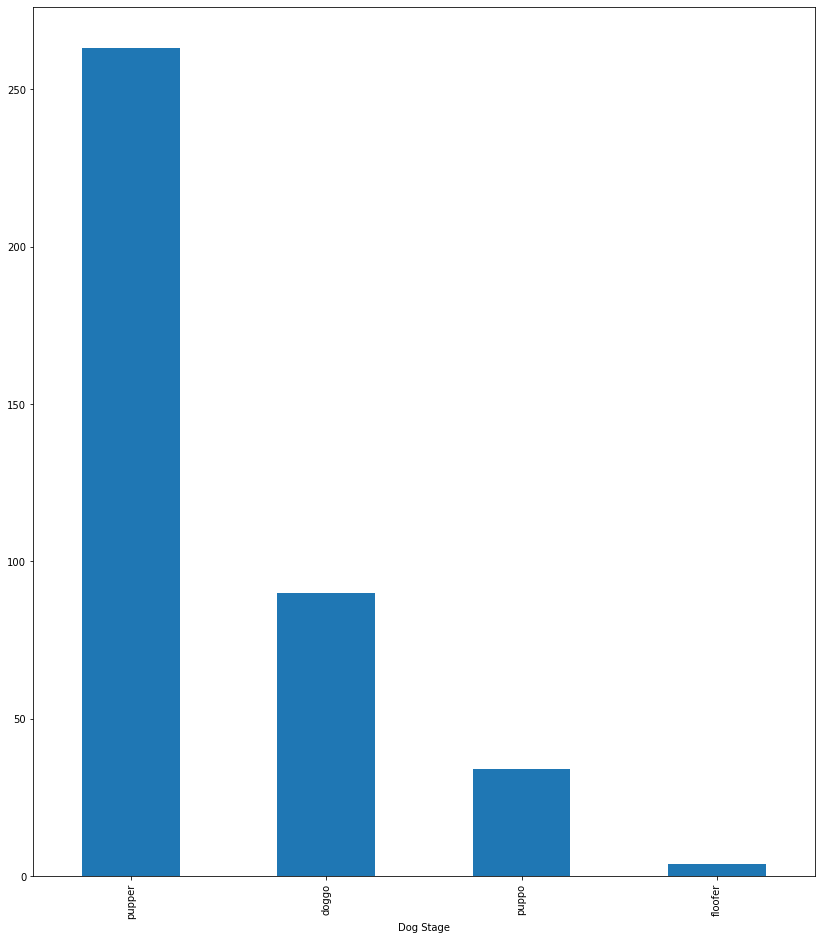

In [71]:
all_df.dog_stage.value_counts().plot(kind='bar', figsize=[14,16], xlabel='Dog Stage')

#### Insight
<li> Pupper has the highest count
<li> Floofer has the lowest count

#### What rating number is the most used for Numerator?

In [72]:
all_df.rating_numerator.value_counts

<bound method IndexOpsMixin.value_counts of 0       13
1       13
2       12
3       13
4       12
        ..
2292     5
2293     6
2294     9
2295     7
2296     8
Name: rating_numerator, Length: 2297, dtype: int64>

<AxesSubplot:xlabel='Numerator Numbers'>

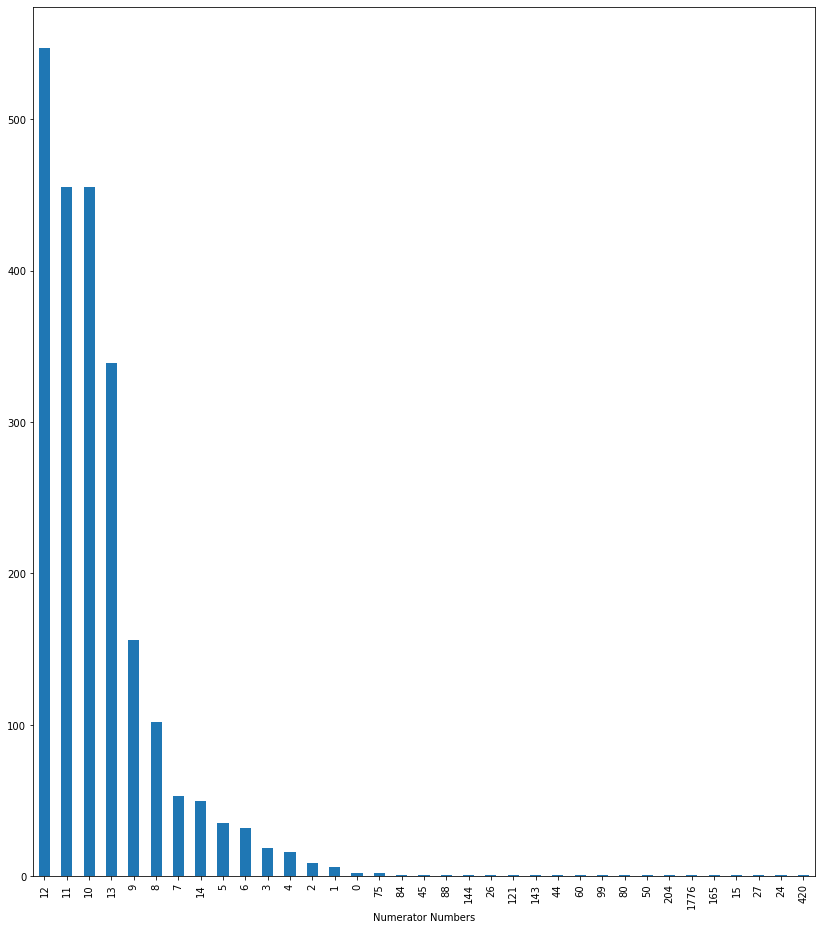

In [73]:
all_df.rating_numerator.value_counts().plot(kind='bar', figsize=[14,16], xlabel='Numerator Numbers')


#### Insight
Twelve is the most popular rating numerator for dogs

#### Is there correlation between retweet count and favorite count?

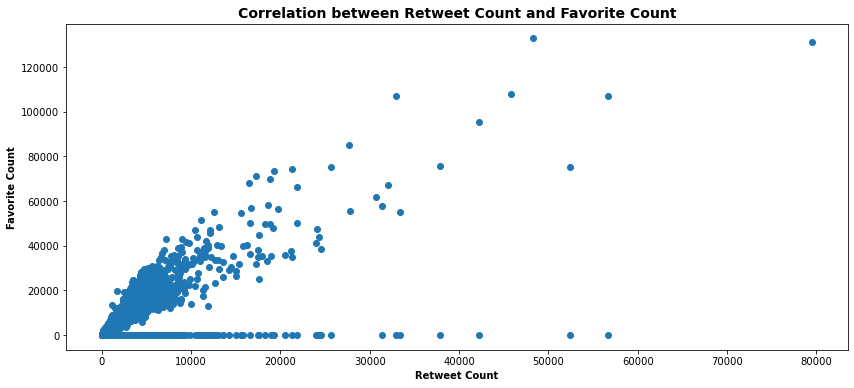

In [74]:
plt.figure(figsize=(14,6))
plt.scatter(all_df.retweet_count,all_df.favorite_count)
#set title
plt.title('Correlation between Retweet Count and Favorite Count', fontsize=14, weight='bold')
#set xlabel
plt.xlabel('Retweet Count', fontsize=10, weight='bold')
#set ylabel
plt.ylabel('Favorite Count', fontsize=10, weight='bold')
 #change scientific notation for tick lables
plt.ticklabel_format(style='plain', axis='both')

#### Insight
There is a postive correlation between Retweet Count and favorite count